<a href="https://colab.research.google.com/github/Dawoodayaz20/Gen_AI_Engineering/blob/main/Langgraph_module01_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are edges. Edges connect the nodes

In [1]:
%%capture --no-stderr
!pip install --quiet -U langgraph

In [3]:
from typing_extensions import TypedDict
class LearningState(TypedDict):
  prompt : str

lahore_state : LearningState = LearningState(prompt="Hello World from Lahore")

print(lahore_state)
print(type(lahore_state))
print(lahore_state['prompt'] + 'I am')


{'prompt': 'Hello World from Lahore'}
<class 'dict'>
Hello World from LahoreI am


Nodes are just python functions.
The first positional argument is the state, as defined above.
Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].
Each node returns a new value of the state key graph_state.
By default, the new value returned by each node will override the prior state value.

In [4]:
def node_1(state: LearningState) -> LearningState:
    print("---Node 1 State---", state)
    return {"prompt": state['prompt'] +" I am"}

def node_2(state: LearningState) -> LearningState:
    print("---Node 2 State---", state)
    return {"prompt": state['prompt'] +" happy!"}

Graph Construction:
The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.


In [5]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph #type

#Build graph
builder: StateGraph = StateGraph(state_schema=LearningState)

print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


builder builds the graph.

In [6]:
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [7]:
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [8]:
graph: CompiledStateGraph = builder.compile()
print(graph)
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


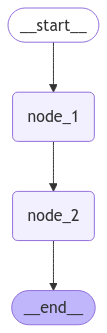

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

Graph Invocation:
The compiled graph implements the runnable protocol.
invoke is one of the standard methods in this interface.
The input is a dictionary {"graph_state": "Hi, this is lance."}, which sets the initial value for our graph state dict.
When invoke is called, the graph starts execution from the START node.
The execution continues through the defined nodes until it reaches the END node.

In [10]:
graph.invoke({"prompt": "Hi"})

---Node 1 State--- {'prompt': 'Hi'}
---Node 2 State--- {'prompt': 'Hi I am'}


{'prompt': 'Hi I am happy!'}

Task: In Nodes Use LLM == GoogleCHATModel in LangChain


In [11]:
!pip install -q -U langchain
!pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00


In [13]:
from google.colab import userdata
google_api_key = userdata.get('api_key')

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key = google_api_key
)

In [15]:
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("Hi?")
print(ai_msg.content)

Hi there! How can I help you today?



In [16]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
    prompt: str
    output: str

In [18]:
def node_1(state: FirstLLMAgentCall):
    print("---Node 1---", state)
    prompt = state["prompt"]
    ai_msg: AIMessage = llm.invoke(prompt)
    return {"output": ai_msg.content}


In [19]:
zeeshan_bhai_greet_message = node_1(FirstLLMAgentCall(prompt="Hello from UMT"))
print(zeeshan_bhai_greet_message)

---Node 1--- {'prompt': 'Hello from UMT'}
{'output': 'Hello from here!  Is there anything I can help you with today?\n'}
